
<br>
<font>
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=150 height=150> <br>
<font color=0F5298 size=7>
Artificial Intelligence <br>
<font color=2565AE size=5>
Computer Engineering Department <br>
Spring 2024<br>
<font color=3C99D size=5>
Practical Assignment 5 - RL <br>
<font color=696880 size=4>
Amirmahdi Meighani


____

# Personal Data

In [ ]:
# Set your student number and name
student_number = '401105815'
Name = 'Radin'
Last_Name = 'Cheraghi'

# Rules

<font color=red>
Please run all the cells.
</font>

# Q1: Mountain Car (100 Points)

In this notebook we have a game called mountain car. the car is in a valley and at evey moment we can model its state using two floats as speed and location along x axis. You can control the car using three actions.

0: Accelerate to the left

1: Don’t accelerate

2: Accelerate to the right

the goal is to reach the peak of mountain in the minimum number of frames. because you get -1 reward for evey timestamp.

you should model the countious enviroment with a approximate descrete one and train your agent using Q learning and SARSA algorithms.


install required libraries

In [ ]:
!pip install numpy
!pip install matplotlib
!pip install gymnasium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 5.4 MB/s eta 0:00:00


## imports

In [ ]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import random
import math

In [ ]:
def visualize(env):
    '''
    use this function to see the state of the game in the current moment
    '''
    env_screen = env.render()
    plt.imshow(env_screen)
    plt.axis('off');
    title = 'speed is ' + str(env.unwrapped.state[1])

    plt.title(title)
    plt.show()

## Q Learning

in this question we have a countious enviroment but you can approximate it as a discrete enviormnet then learn and act according to that.

you can see the information of game below.

In [ ]:
env = gym.make("MountainCar-v0",render_mode='rgb_array',max_episode_steps=200)
spec = gym.spec('MountainCar-v0')

Action Space: Discrete(3)
Observation Space: Box([-1.2  -0.07], [0.6  0.07], (2,), float32)
Max Episode Steps: 200
Nondeterministic: False
Reward Range: (-inf, inf)
Reward Threshold: -110.0



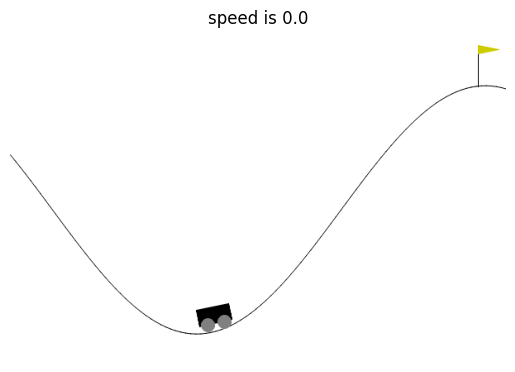

In [ ]:
print(f"Action Space: {env.action_space}")
print(f"Observation Space: {env.observation_space}")
print(f"Max Episode Steps: {spec.max_episode_steps}")
print(f"Nondeterministic: {spec.nondeterministic}")
print(f"Reward Range: {env.reward_range}")
print(f"Reward Threshold: {spec.reward_threshold}\n")
env.reset()
visualize(env)

Observation Space:
The observation is a ndarray with shape (2,) where the elements correspond to the following:

| Num |              Observation             |  Min  |  Max |
|:---:|:------------------------------------:|:-----:|:----:|
|  0  | position of the car along the x-axis |  -1.2 |  0.6 |
|  1  | velocity of the car                  | -0.07 | 0.07 |

Action Space:
There are 3 discrete deterministic actions:

0: Accelerate to the left

1: Don’t accelerate

2: Accelerate to the right

You can play in this env yourself!!!

Try some actions and visulize the env after every 5 action. use env.step(action) function to do actions. print output of some step function. It returns five values :

new_state, reward, is_terminated ,is_truncated ,extra_info

new state after the action, reward for that action in that step, is the game terminated by reaching the goal, is the game finished by reaching 200 episode limit that is the default in this game, and some possible extra info that we don't use.


(array([-0.58726734, -0.0010705 ], dtype=float32), -1.0, False, False, {})


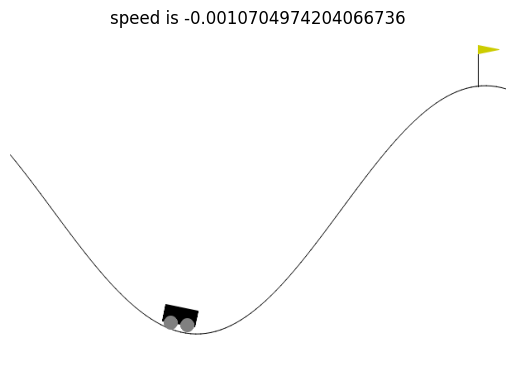

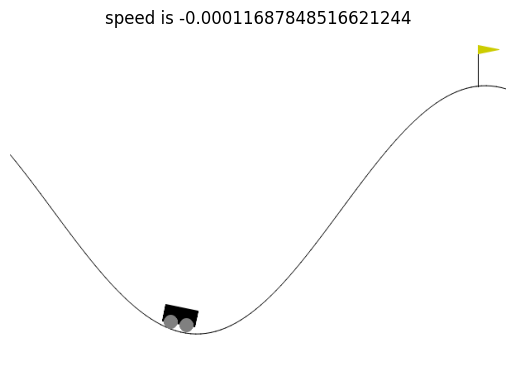

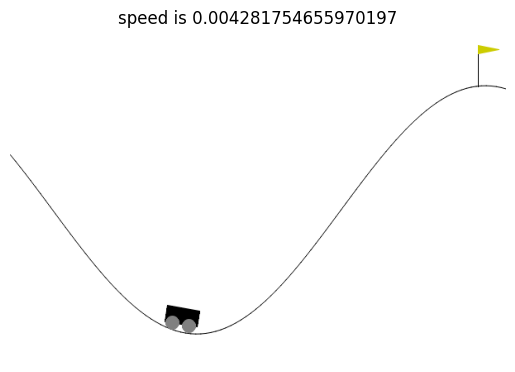

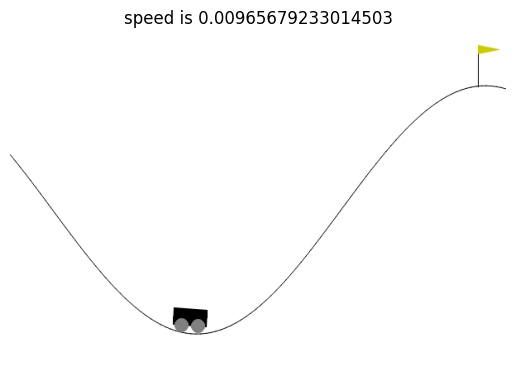

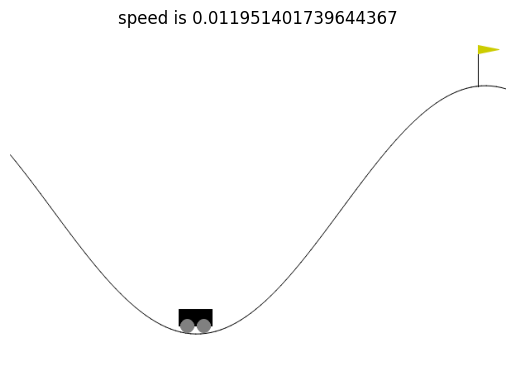

(array([-0.41714826,  0.        ], dtype=float32), {})

In [ ]:
env.reset() # You can use this function to reset your environment.
######################## YOUR CODE HERE ########################
env.step(0)
print(env.step(0))
visualize(env)
env.step(1)
env.step(1)
visualize(env)
env.step(2)
env.step(2)
env.step(2)
visualize(env)
env.step(2)
env.step(2)
env.step(2)
env.step(2)
visualize(env)
env.step(2)
env.step(2)
visualize(env)

######################## END YOUR CODE #########################
env.reset()

the state consists of two floats.  first one is position in x axis and second one is speed. in the next cell we will write our agent. First we need to convert continuous state to descrete so complete the relevant functions. after that we need to train our agent using Q_learning formula:


$$ Q(s,a) \leftarrow Q(s,a) + \alpha \left( r + \gamma \max_{a'} Q(s',a') - Q(s,a) \right) $$

After training we use create policy to save your best actions. Then evaluate your policy.

In [ ]:

class MountainCarQL:

    def __init__(self, env, discrete_size=20):

        self.discrete_size = discrete_size # number of states we use instead of each continuous argument of state
        self.env = env
        self.q_values = self.create_q_values_list()
        self.policy = {}

    def create_q_values_list(self):
        # initialize q_table and return it
        # use self.discrete_size
        ######################## YOUR CODE HERE ########################
        shape = []
        for i in range(len(env.observation_space.high)):
          shape.append(self.discrete_size)
        shape.append(self.env.action_space.n)
        return np.zeros(shape)
        ######################## END YOUR CODE #########################



    def get_discrete_state(self, state):
        ######################## YOUR CODE HERE ########################
        # use self.discrete_size
        shape = []
        for i in range(len(env.observation_space.high)):
          shape.append(self.discrete_size)
        new_state = (state - self.env.observation_space.low)
        env_range = (self.env.observation_space.high - self.env.observation_space.low) / shape
        # print(state, self.env.observation_space.low)
        return tuple((new_state / env_range).astype(np.int32))
        ######################## END YOUR CODE #########################



    def learn(self, num_episodes, alpha, gamma, epsilon):
        ######################## YOUR CODE HERE ########################
      for i in range(num_episodes):
        state = self.env.reset()
        discrete_state = self.get_discrete_state(state[0])
        flag = False
        while flag == False:
            if np.random.random() > epsilon:
                action = np.argmax(self.q_values[discrete_state])
            else:
                action = self.env.action_space.sample()
            new_state, reward, terminated,truncated, more_info = self.env.step(action)
            converted_state = self.get_discrete_state(new_state)
            flag = truncated or terminated

            if flag == False:
                Max_Q = np.max(self.q_values[converted_state])
                self.q_values[discrete_state + (action,)] = self.q_values[discrete_state + (action,)] + alpha * (reward + gamma * Max_Q - self.q_values[discrete_state + (action,)])

            elif self.env.unwrapped.goal_position <= new_state[0]:
                self.q_values[discrete_state + (action,)] = reward
                print("goal accessed")
            discrete_state = converted_state

        if epsilon > 0.01:
            epsilon *= 0.995

        ######################## END YOUR CODE #########################



    def create_policy(self):
        """
        Create your policy in this function after your agent learns the q_values.
        """
        ######################## YOUR CODE HERE ########################
        self.policy = np.argmax(self.q_values, axis=-1)
        ######################## END YOUR CODE #########################

    def act(self):
        current_state = self.env.unwrapped.state
        discrete_state = self.get_discrete_state(current_state)
        action = self.policy[discrete_state]
        next_state, reward, terminated, truncated,more_info = self.env.step(action)
        return (reward, truncated or terminated)

    def evaluate(self, num_episodes):
        """
        Sample num_episodes episodes from your agent that acts according to your policy.
        Then return the average rewards it gets and percentage of episodes that your car reached the goal.

        Inputs:
            - num_episodes: Number of episodes for sampling.
        Returns:
            tuple: average reward and win percentage
        """
        ######################## YOUR CODE HERE ########################
        win_num = 0
        total_sum = 0
        for episode in range(num_episodes):
          termination = False
          score = 0
          self.env.reset()
          while termination == False:
            reward,termination = self.act()
            score += reward
          total_sum += score
          if score != -200:
            win_num += 1
        sum_average = total_sum / num_episodes
        win_rate = win_num / num_episodes
        return sum_average, 100 * win_rate
        ######################## END YOUR CODE #########################

train your agent with good parameters

In [ ]:
EPISODES = 5000
LEARNING_RATE = 0.25
DISCOUNT = 0.9
EPSILON = 0.3
DISCRETE_SIZE = 30


mountain_car_ql = MountainCarQL(env,discrete_size=DISCRETE_SIZE)
mountain_car_ql.learn(EPISODES, LEARNING_RATE, DISCOUNT, EPSILON)


goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal a

evaluate your agent with at least 200 episodes. your average score must be more than -170.

In [ ]:
# todo
mountain_car_ql.create_policy()
print(mountain_car_ql.evaluate(400))

(-139.75, 100.0)


show the path your car took for only one episode. Use visualize function every 10 frame.

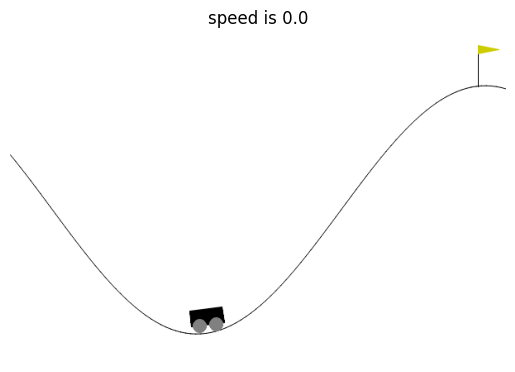

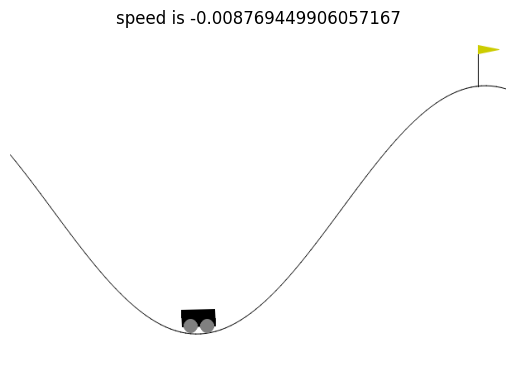

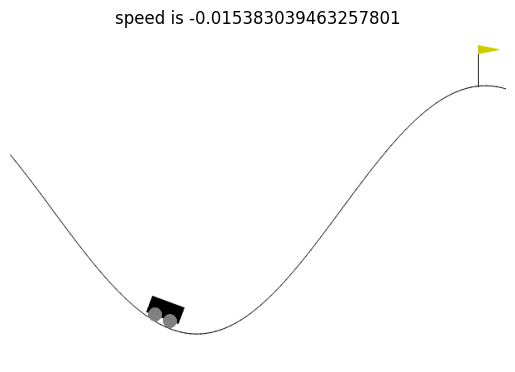

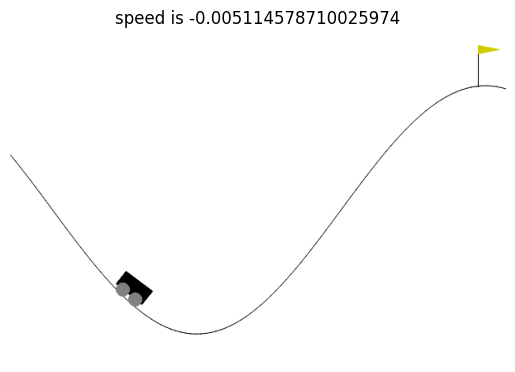

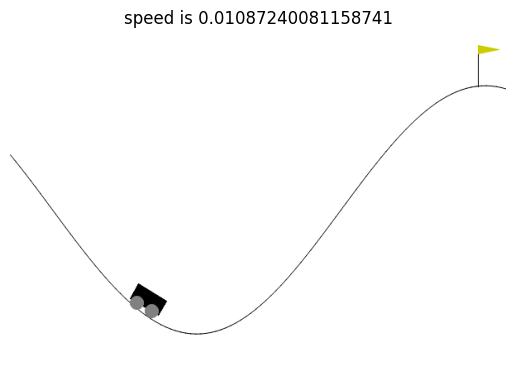

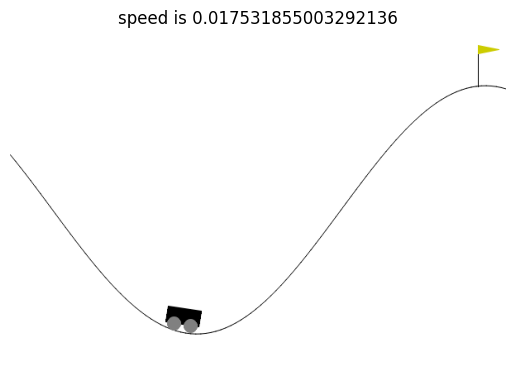

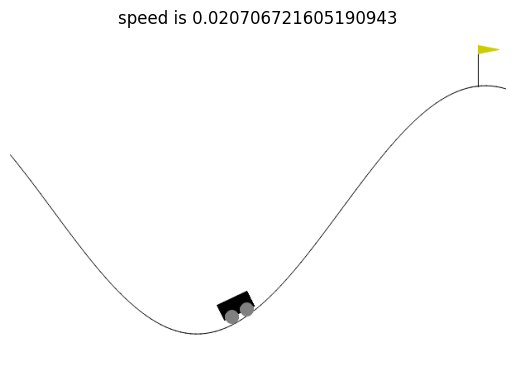

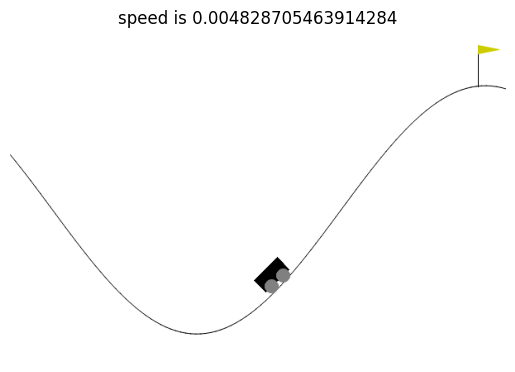

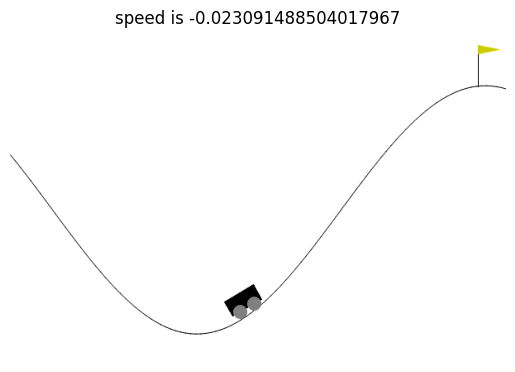

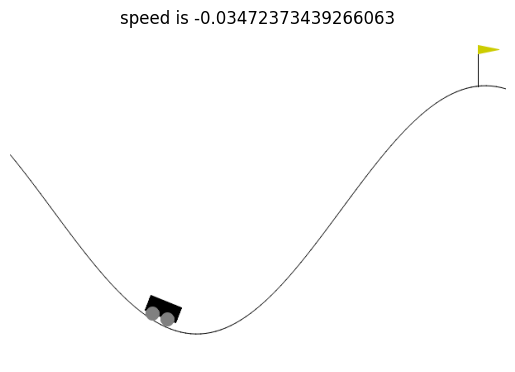

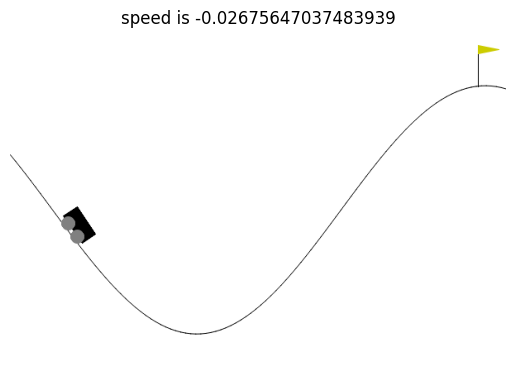

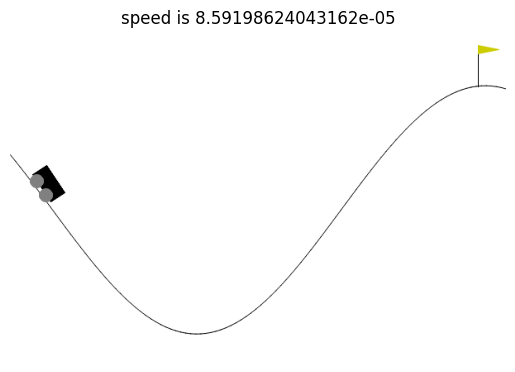

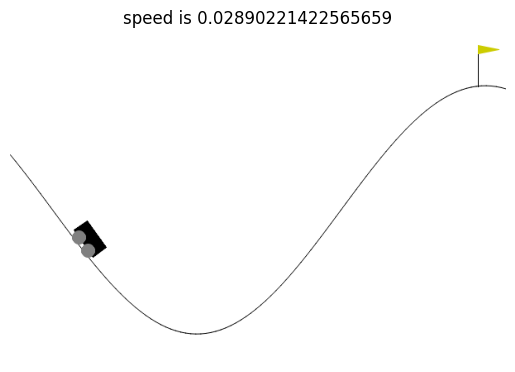

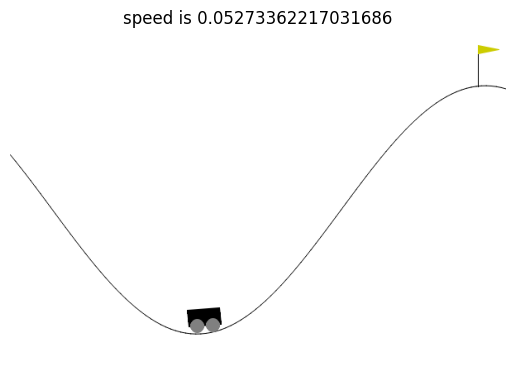

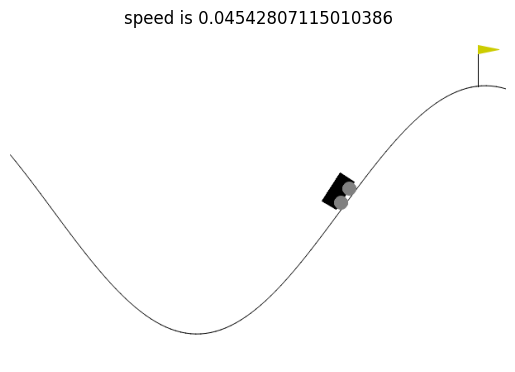

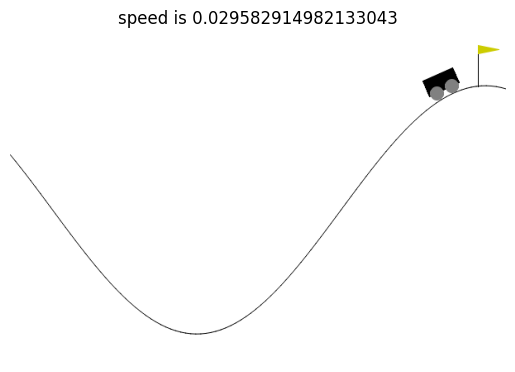

In [ ]:
# todo
termination = False
mountain_car_ql.env.reset()
counter = 0
while termination == False:
  if counter % 10 == 0:
    visualize(env)
  reward,termination = mountain_car_ql.act()
  counter += 1

## SARSA
now we want to use sarsa algorithm here instead of Q learning. The update rule is:

$$Q(S_t,A_t) \leftarrow Q(S_t,A_t) + \alpha \left( R_{t+1} + \gamma Q(S_{t+1},A_{t+1}) - Q(S_t,A_t) \right)$$

In [ ]:
class MountainCarSarsa(MountainCarQL):

  def learn(self, num_episodes, alpha, gamma, epsilon):
    ######################## YOUR CODE HERE ########################
    for i in range(num_episodes):
        state = self.env.reset()
        discrete_state = self.get_discrete_state(state[0])
        flag = False
        if np.random.random() > epsilon:
            action = np.argmax(self.q_values[discrete_state])
        else:
            action = self.env.action_space.sample()
        while flag == False:
            # if np.random.random() > epsilon:
            #     action = np.argmax(self.q_values[discrete_state])
            # else:
            #     action = self.env.action_space.sample()
            new_state, reward, terminated,truncated, more_info = self.env.step(action)
            converted_state = self.get_discrete_state(new_state)
            flag = truncated or terminated
            if np.random.random() > epsilon:
                action_prime = np.argmax(self.q_values[discrete_state])
            else:
                action_prime = self.env.action_space.sample()
            if flag == False:
                Q_s_prime =  self.q_values[converted_state][action_prime]
                self.q_values[discrete_state + (action,)] = self.q_values[discrete_state + (action,)] + alpha * (reward + gamma * Q_s_prime - self.q_values[discrete_state + (action,)])

            elif self.env.unwrapped.goal_position <= new_state[0]:
                self.q_values[discrete_state + (action,)] = reward
                print("goal accessed")
            action = action_prime
            discrete_state = converted_state

        if epsilon > 0.01:
            epsilon *= 0.995


    ######################## END YOUR CODE #########################

train your agent with good parameters

In [ ]:
EPISODES = 5000
LEARNING_RATE = 0.3
DISCOUNT = 0.9
EPSILON = 0.3
DISCRETE_SIZE = 30

mountain_car_sarsa = MountainCarSarsa(env,discrete_size=DISCRETE_SIZE)
mountain_car_sarsa.learn(EPISODES, LEARNING_RATE, DISCOUNT, EPSILON)


goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal accessed
goal a

evaluate your agent with at list 200 episodes. your average score must be more than -175.

In [ ]:
# todo

mountain_car_sarsa.create_policy()
print(mountain_car_sarsa.evaluate(400))

(-172.9725, 96.25)


show the path your car took for only one episode. Use visualize function every 10 frame.

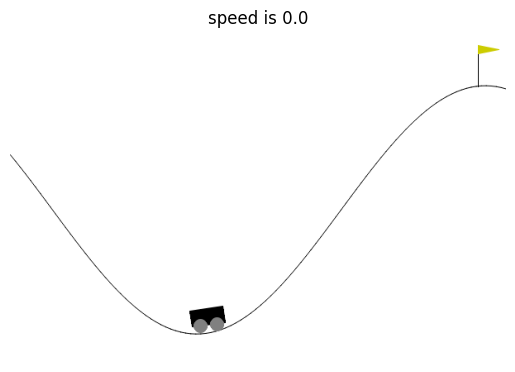

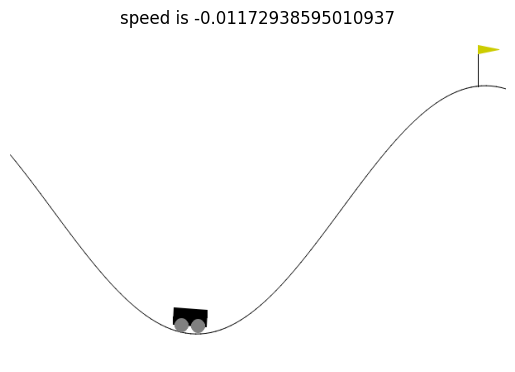

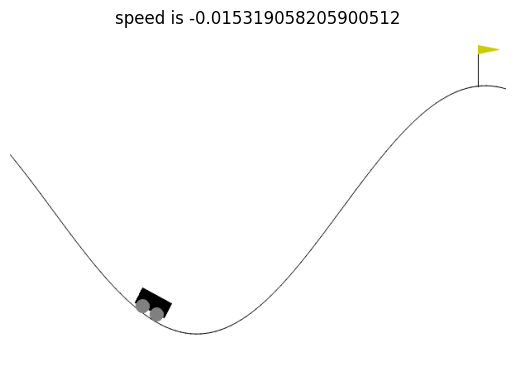

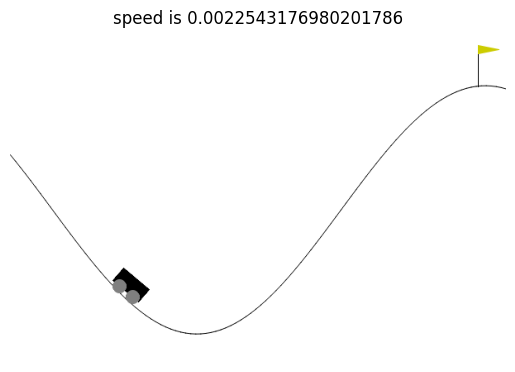

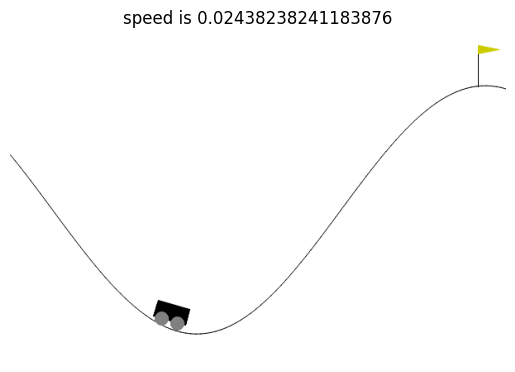

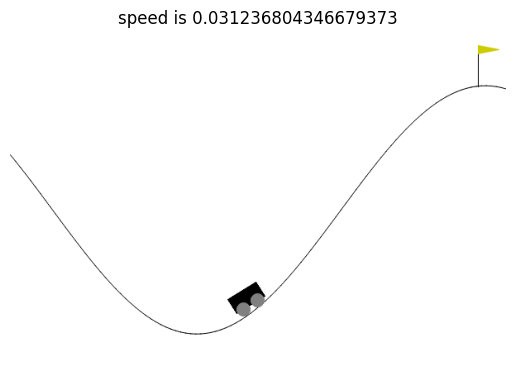

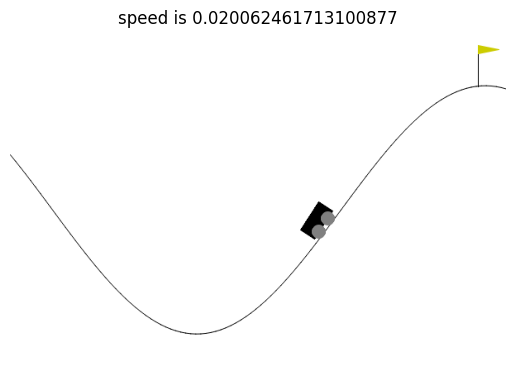

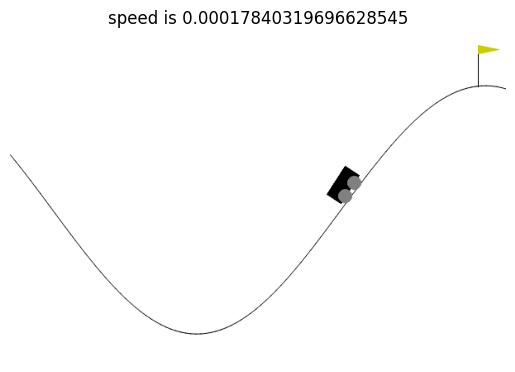

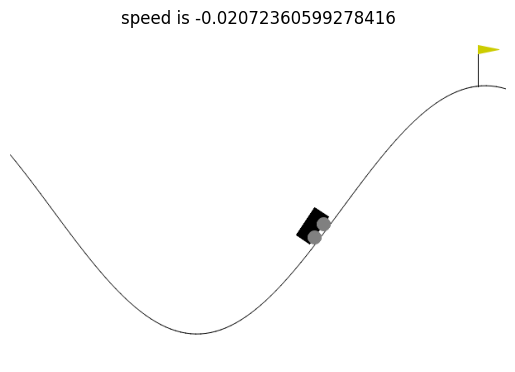

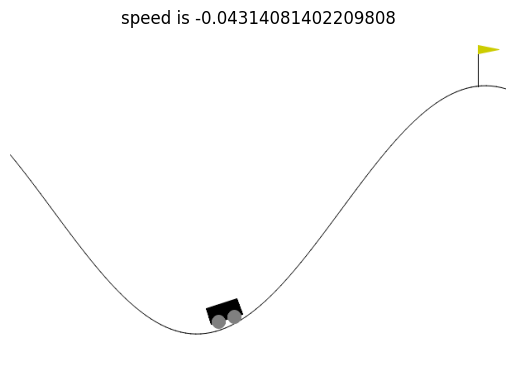

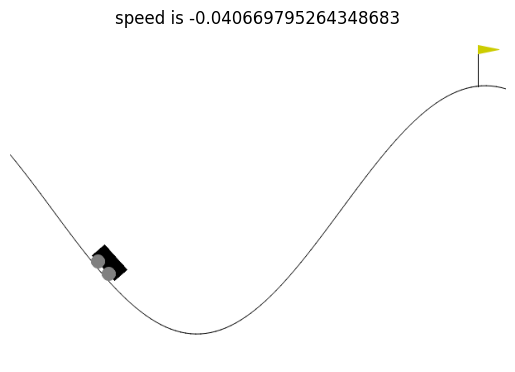

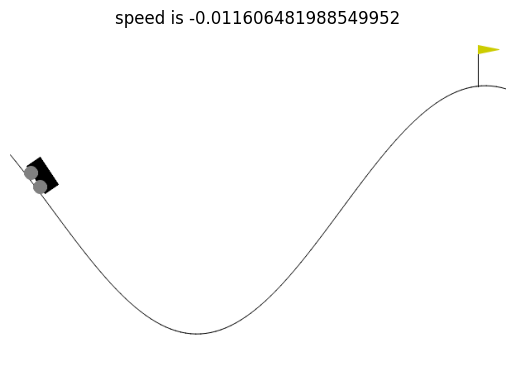

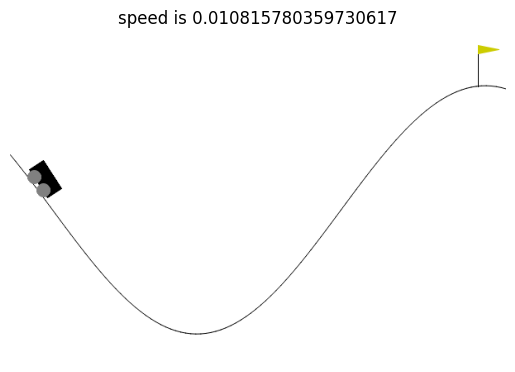

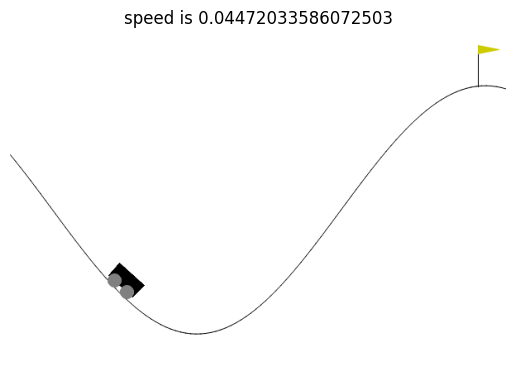

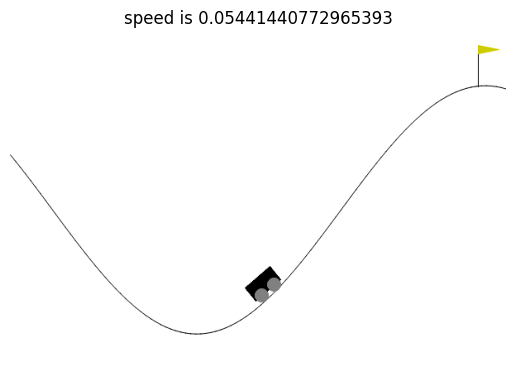

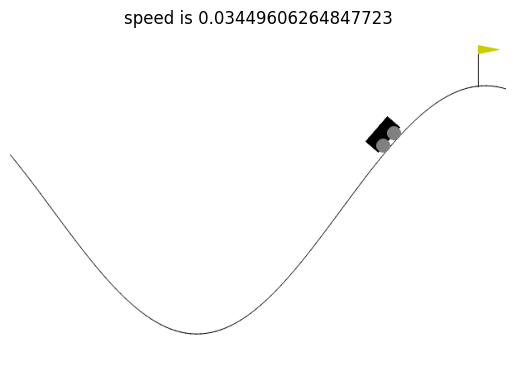

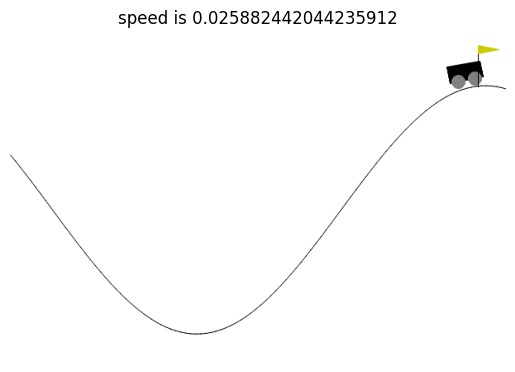

In [ ]:
# todo
# todo
termination = False
mountain_car_sarsa.env.reset()
counter = 0
while termination == False:
  if counter % 10 == 0:
    visualize(env)
  reward,termination = mountain_car_sarsa.act()
  counter += 1

Is there any difference between the two algorithms? Compare results and explain why.

Answer:
We can see that average score of SARSA is worse than Q_learning.SARSA perform worse than Q-learning in some scenarios because it is more cautious and influenced by the exploratory actions during learning

